# Project: Bay Wheels Data Visualization

## Overview
In this project, we aimed to analyze the dataset from Bay Wheels to understand or at least find some insights about the consumer behaviour in the bay area. The Bay Wheels shares all the data from each ride in their website (you can find it here: https://www.lyft.com/bikes/bay-wheels/system-data ), for this project we are going to focus on the data in 2019.

In order to achieve our goal, this analysis will be guided by the following points:
- Distribution of trips in terms of month, day of week and hour
- Most common and least common start station
- Distribution of trip duration
- Distribution of trip distance
- Relationship between trip duration and distance
- User Habit/Behavior

In [10]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Import dataset
df_clean = pd.read_csv('dataset/clean_data/baywheels_2019_clean.csv')

In [13]:
# Removing the rainbow colors and use only ONE color
base_color = sns.color_palette()[0]

# Set sns style
sns.set(style="darkgrid")

In [14]:
# Change bike_id, start_station_id and end_station_id to object dtype (string)
cols = ['bike_id', 'start_station_id', 'end_station_id']
for c in cols:
    df_clean[c] =  df_clean[c].astype(str).str[:-2]
    
df_clean['bike_id'] = df_clean['bike_id'].str.pad(width=6, side='left', fillchar='0')
df_clean['bike_id'].replace('00000n', np.nan, inplace=True)

cols = ['start_station_id', 'end_station_id']
for c in cols:
    df_clean[c] =  df_clean[c].astype(str).str.pad(width=3, side='left', fillchar='0')
    df_clean[c].replace('00n', np.nan, inplace=True)

### Part A 
### Distribution of trips in terms of month, day of week and hour

#### Monthly Usage of Bay Wheels

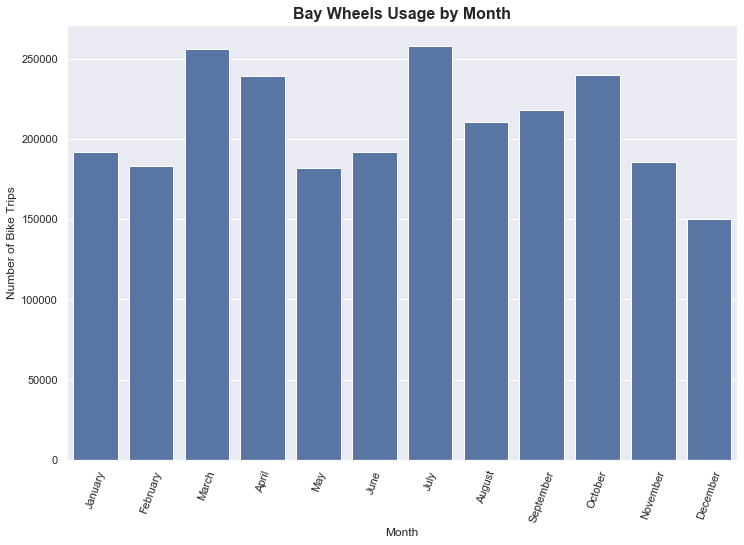

In [17]:
# Monthly usage of the Bay Wheels
plt.figure(figsize=(12, 8))
ax = sns.countplot(data = df_clean, 
                   x = 'start_time_month', 
                   color = base_color)
ax.set_title('Bay Wheels Usage by Month', fontdict = {'fontsize':16,  'fontweight':'bold'})
ax.set_xlabel('Month')
ax.set_ylabel('Number of Bike Trips')
#ax.set(xlabel='Month', ylabel='Number of Bike Trips', title='Bay Wheels Usage by Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

The summer months and early-mid autumn are the most popular times to use the Bay Wheels sharing system. March and July are the most popular months, with April and October coming in closely as the third and forth most popular months to use the bike system. The weather in San Francisco is best in the mid-late summer and usually stays sunny until returning to its usual foggy weather in the late autumn/early winter months.

#### Weekly Usage of Bay Wheels

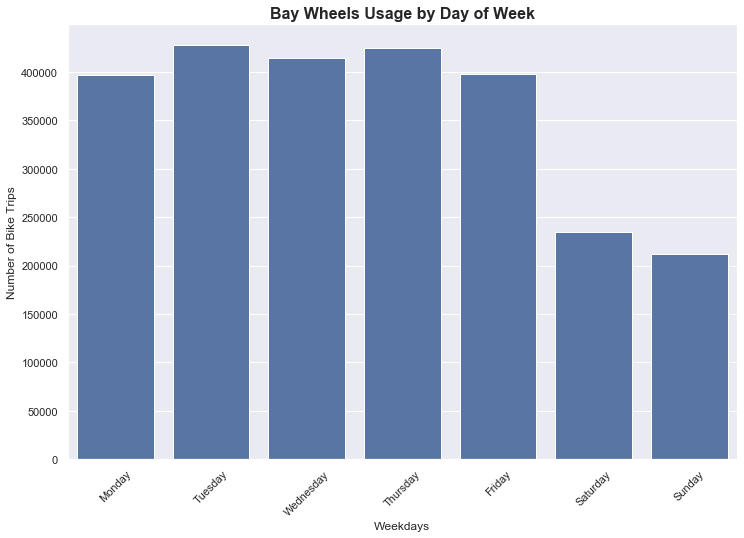

In [18]:
# Weekday usage of the Bay Wheels system
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12, 8))
ax = sns.countplot(data = df_clean, 
                   x = 'start_time_weekday', 
                   color = base_color,
                   order = day_order)
ax.set_title('Bay Wheels Usage by Day of Week', fontdict = {'fontsize':16,  'fontweight':'bold'})
ax.set_xlabel('Weekdays')
ax.set_ylabel('Number of Bike Trips')
#ax.set(xlabel='Month', ylabel='Number of Bike Trips', title='Bay Wheels Usage by Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Tuesdays seem to be the most popular day for using the bike sharing system, however the other weekdays  are very close to it. The usage drops significantly on weekend (Saturdays and Sundays) suggesting the Bay Wheels system is used primarily for commuting purposes during working days

#### Hour Usage of Bay Wheels

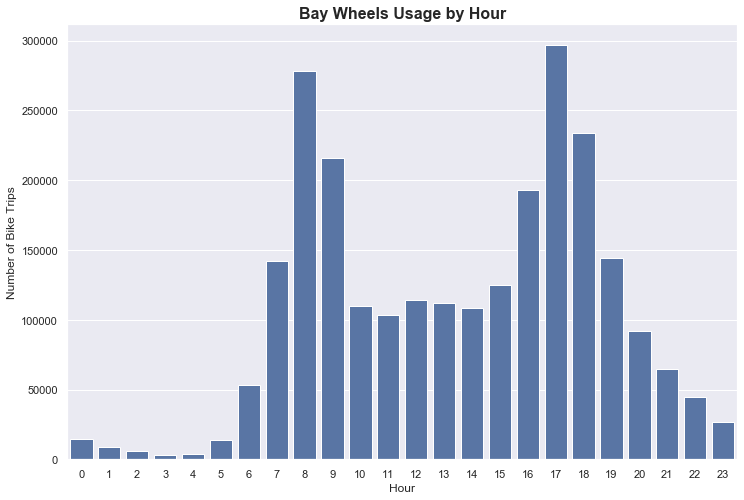

In [19]:
# Hour usage of the Ford Go Bike system
plt.figure(figsize=(12, 8))
ax = sns.countplot(data = df_clean, 
                   x = 'start_time_hour', 
                   color = base_color)
ax.set_title('Bay Wheels Usage by Hour', fontdict = {'fontsize':16,  'fontweight':'bold'})
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Bike Trips')
ax.set_xticklabels(ax.get_xticklabels());

The bikes saw the most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm, which is a typical workday in the United States. This furthers the suggestion that the bikes are being used primarily for commuters

#### Monthly Usage of Bay Wheels by User Type

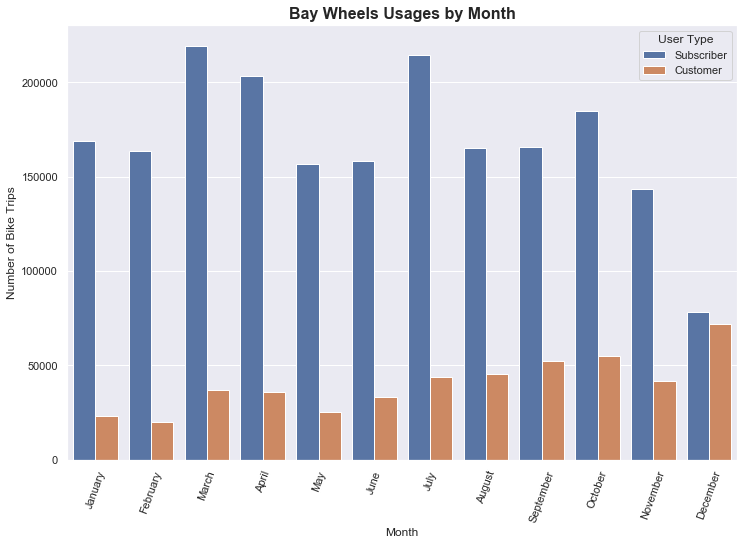

In [20]:
# Monthly usage of the Bay Wheels by each user type
plt.figure(figsize=(12, 8))
ax = sns.countplot(data = df_clean, 
                   x = 'start_time_month', 
                   hue='user_type')
ax.set_title('Bay Wheels Usages by Month', fontdict = {'fontsize':16,  'fontweight':'bold'})
ax.set_xlabel('Month')
ax.set_ylabel('Number of Bike Trips')
#ax.set(xlabel='Month', ylabel='Number of Bike Trips', title='Bay Wheels Usage by Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.legend(title='User Type');

Subscribers always have a relatively high usage of Bay Wheels service compared to customers in almost every month except December which difference  is not significant.

#### Weekly Usage of Bay Wheels by User Type

In [21]:
df_clean_user_week = df_clean.groupby(['start_time_weekday', 'user_type']).size().reset_index()
df_clean_user_week.rename(columns={0:'num_of_trips'}, inplace=True)
df_clean_user_week

,start_time_weekday,user_type,num_of_trips
0,Friday,Customer,75944
1,Friday,Subscriber,321340
2,Monday,Customer,66529
3,Monday,Subscriber,329934
4,Saturday,Customer,72705
5,Saturday,Subscriber,161665
6,Sunday,Customer,64743
7,Sunday,Subscriber,147561
8,Thursday,Customer,70393
9,Thursday,Subscriber,354081


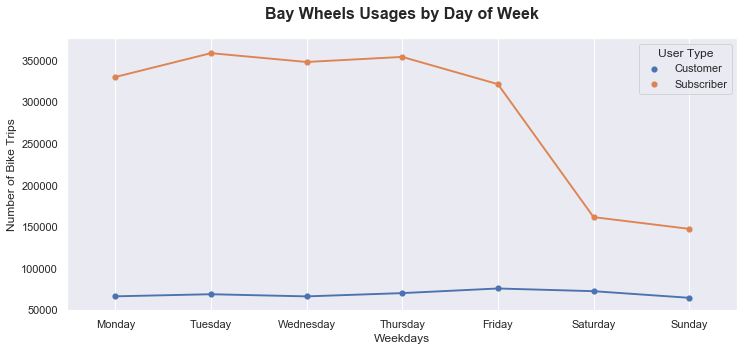

In [22]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize = (12, 5))

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.pointplot(data = df_clean_user_week, 
                   x = 'start_time_weekday',
                   y = 'num_of_trips', 
                   hue = 'user_type', 
                   scale=.7, 
                   order = day_order);
plt.title('Bay Wheels Usages by Day of Week', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips')
plt.legend(title = 'User Type')
plt.grid();

The point plot above is an excellent visual showing the sharp contrast between Customers and Subscribers. Customers have a relatively low usage of the bike share system with a small increase on the weekends. Subscribers are the opposite - there is steadily high usage on weekdays, with a sharp decline on the weekend

#### Day of Week Usage in Each Month

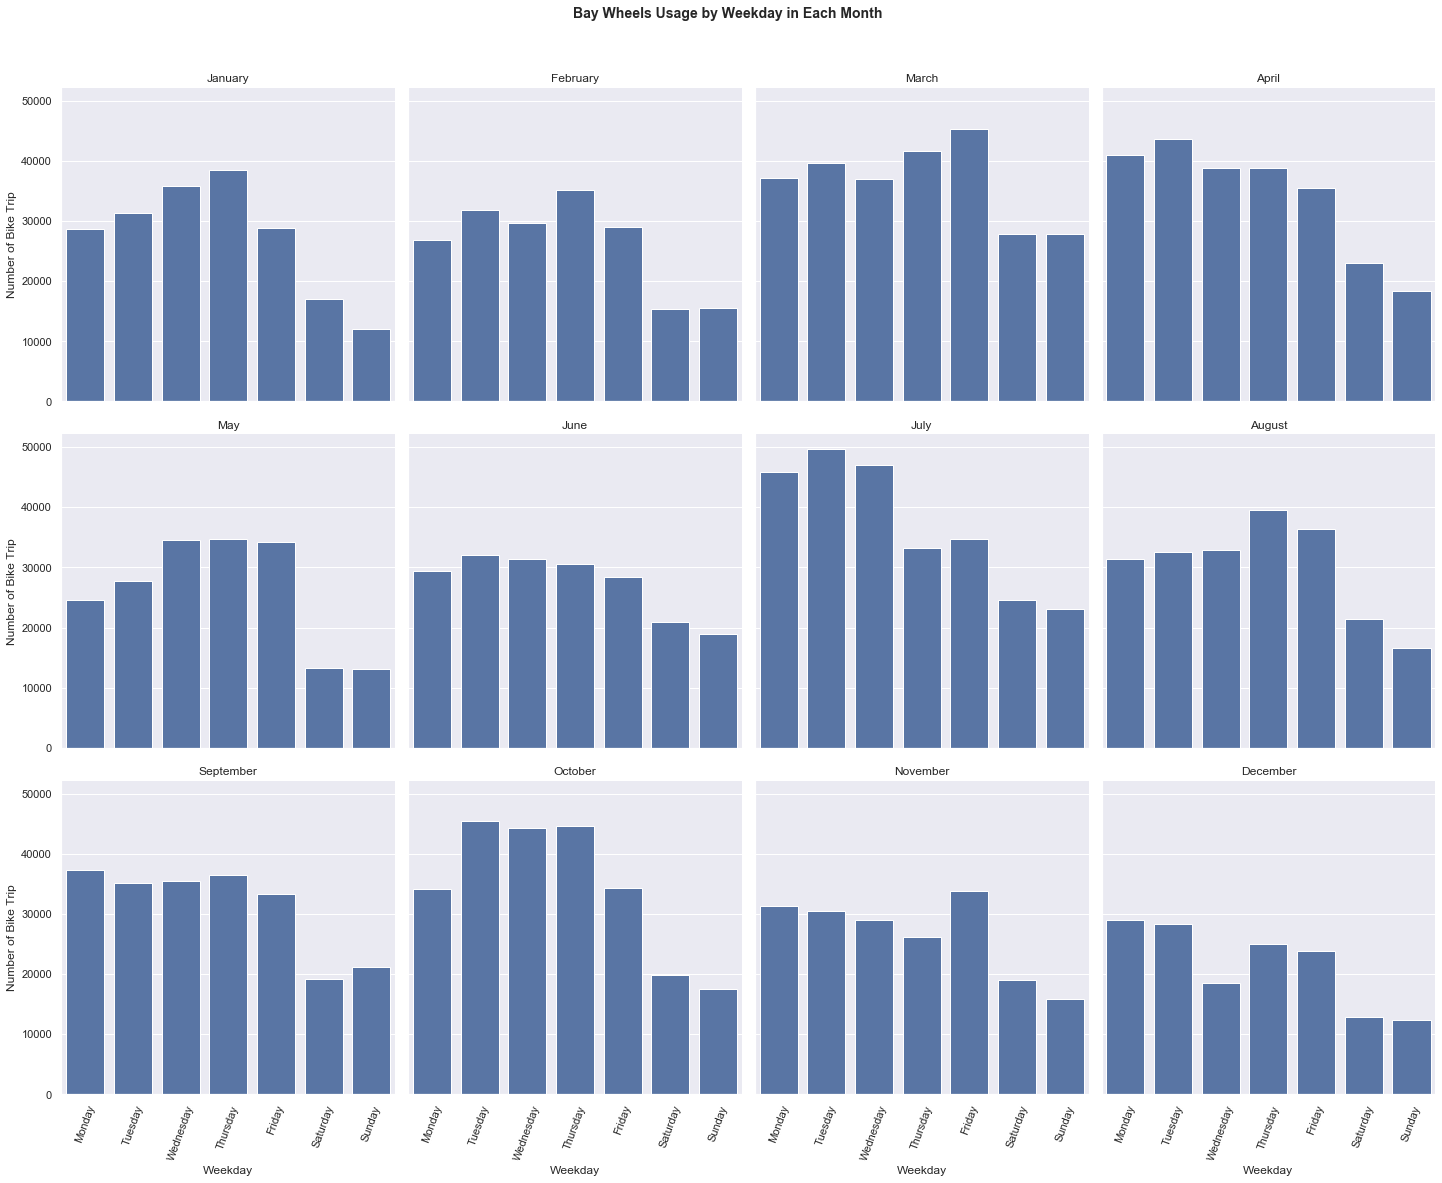

In [23]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
g = sns.FacetGrid(data = df_clean, col = 'start_time_month', col_wrap = 4, height = 5)
g.map(sns.countplot, 'start_time_weekday',  color = base_color, order = day_order)
g.set_titles('{col_name}')
g.set_xlabels('Weekday');
g.set_ylabels('Number of Bike Trip');
g.fig.suptitle('Bay Wheels Usage by Weekday in Each Month', y=1.05, fontsize=14, fontweight='bold')
g.set_xticklabels(rotation=70);

From the visualization, most of the months have the same distribution which is users in weekdays is always more than weekend. The usage reached to peak in April, July and October then decrease gradually in last two months. 

#### Hour Usage by Day of Week

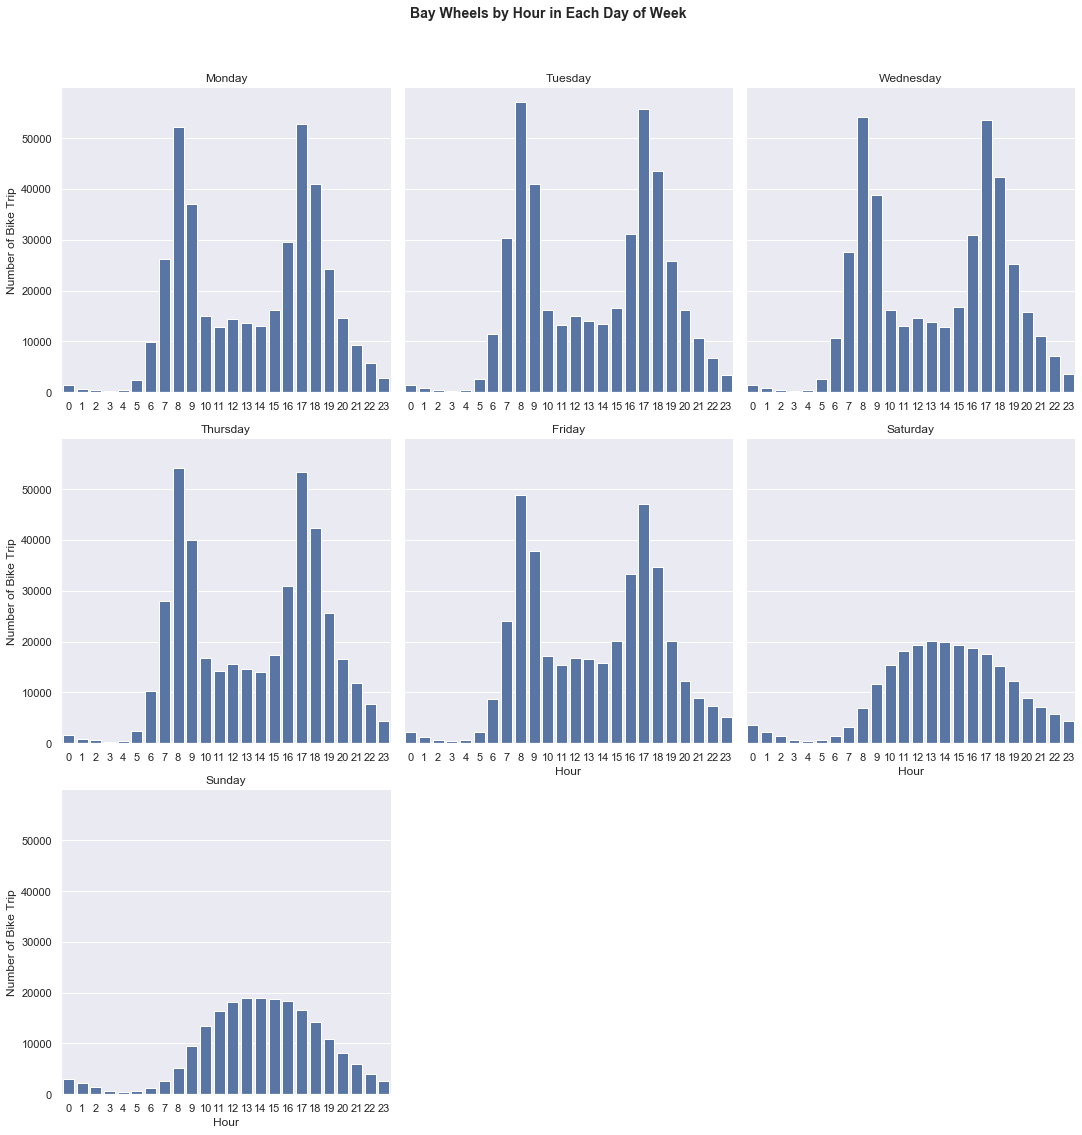

In [24]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayClasses = pd.api.types.CategoricalDtype(ordered = True, categories = day_order)
df_clean['start_time_weekday'] = df_clean['start_time_weekday'].astype(dayClasses)

g = sns.FacetGrid(data = df_clean, col = 'start_time_weekday', col_wrap = 3, height = 5, sharex = False)
g.map(sns.countplot, 'start_time_hour',  color = base_color)
g.set_titles('{col_name}')
g.set_xlabels('Hour');
g.set_ylabels('Number of Bike Trip');
g.fig.suptitle('Bay Wheels by Hour in Each Day of Week', y=1.05, fontsize=14, fontweight='bold');

We can see the similar trend from Monday to Friday where usage are highly distributed in commute time while usages in Saturday and Sunday are distributed at evening session. We can conclude that most of the user take the bike to travel either to work or study.

### Part B
### Most common and least common start station

#### Most Common Start Station 

In [25]:
# Number of trips of each start station
station_trip = df_clean.groupby('start_station_id')['bike_id'].count().sort_values(ascending=False).reset_index()
station_trip.rename(columns={'bike_id':'num_of_trips'}, inplace=True)
station_trip

,start_station_id,num_of_trips
0,058,45058
1,081,42962
2,030,40302
3,015,39016
4,067,36576
...,...,...
431,429,4
432,329,3
433,444,3
434,484,2


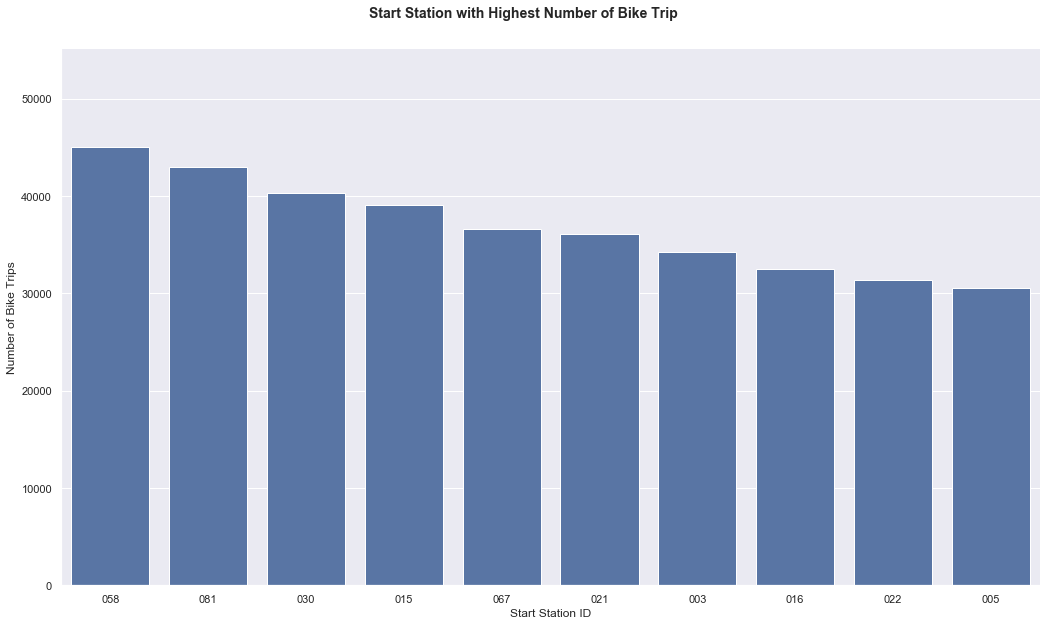

In [26]:
# Number of bike trips of start station
ax = sns.catplot(data = station_trip.head(10), 
                 x = 'start_station_id',
                 y = 'num_of_trips',
                 kind='bar',
                 color = base_color,
                 order = station_trip.head(10).start_station_id,
                 height = 8.27,  aspect = 14.70/8.27);
ax.set_axis_labels('Start Station ID', 'Number of Bike Trips')
ax.fig.suptitle('Start Station with Highest Number of Bike Trip', y=1.05, fontsize=14, fontweight='bold')
ax.set(ylim=(0, station_trip.head(10).num_of_trips.max() + 10000));

#### Least Common Start Station 

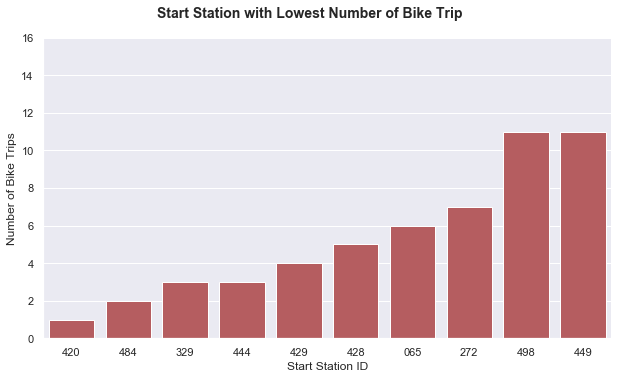

In [27]:
# Number of bike trips of start station
ax = sns.catplot(data = station_trip.tail(10), 
                 x = 'start_station_id',
                 y = 'num_of_trips',
                 kind='bar',
                 color = sns.color_palette()[3],
                 order = station_trip.tail(10).sort_values(by = 'num_of_trips').start_station_id,
                 aspect = 1.75);
ax.set_axis_labels('Start Station ID', 'Number of Bike Trips')
ax.fig.suptitle('Start Station with Lowest Number of Bike Trip', y=1.05, fontsize=14, fontweight='bold');
ax.set(ylim=(0, station_trip.tail(10).num_of_trips.max() + 5));

Most common start station can help us identify which station has the potential to attract more and more customer while we can also find out the weakness or reason behind from those lease common stations.

### Part C
### Distribution of trip duration

#### Distribution of Trip Duration

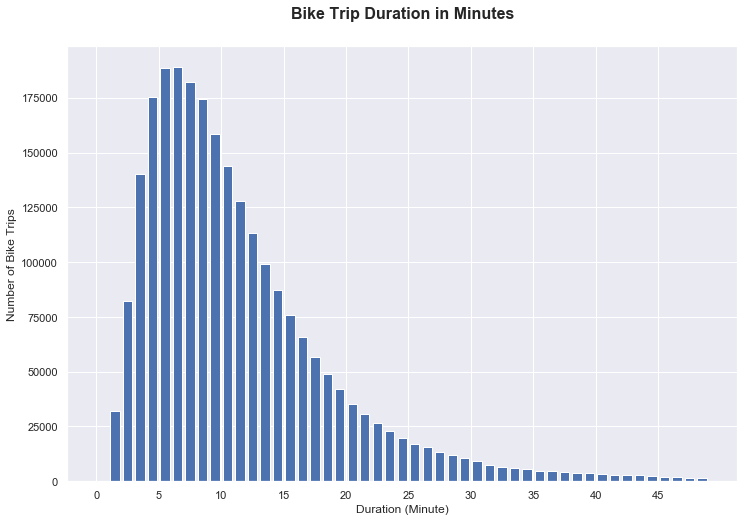

In [28]:
# Duration of the bike rides in MINUTES
bin_edges = np.arange(0, 50, 1)
ticks = np.arange(0, 50, 5).tolist()
labels = ['{}'.format(val) for val in ticks]
plt.figure(figsize=(12, 8))
plt.hist(data = df_clean, x = 'duration_min', bins = bin_edges, rwidth = 0.75);
plt.title("Bike Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Minute)')
plt.ylabel('Number of Bike Trips')
plt.xticks(ticks, labels);

The distribution of trip duration is right skewed with an average 13 minutes of ride. This suggests riders are taking the bikes for short distances 

#### Distribution of Bike Trip Duration by User Type

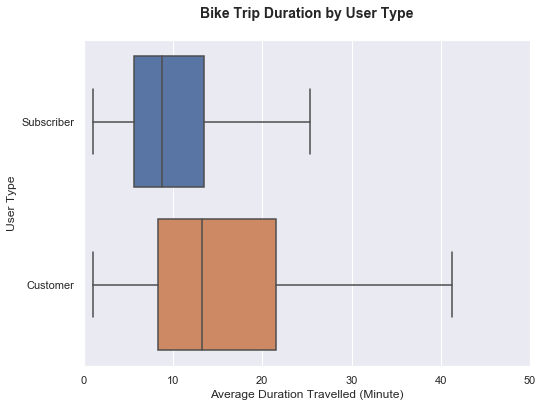

In [29]:
# Distribution of duration
plt.figure(figsize=(8, 6))
sns.boxplot(data = df_clean, 
            y = 'user_type', 
            x = 'duration_min',
            showfliers = False);
plt.title('Bike Trip Duration by User Type', y=1.05, fontsize=14, fontweight='bold')
plt.ylabel('User Type')
plt.xlabel('Average Duration Travelled (Minute)')
plt.xlim(0, 50);

This figure shows that customers will use the bike longer compared to subsriber. We can assume most of the subscribers use the bike for a short travel, for work or study while customers is tends to enjoy the bike trip.

### Part D
### Distribution of trip distance

#### Average Distance of Bike Trip by User Type

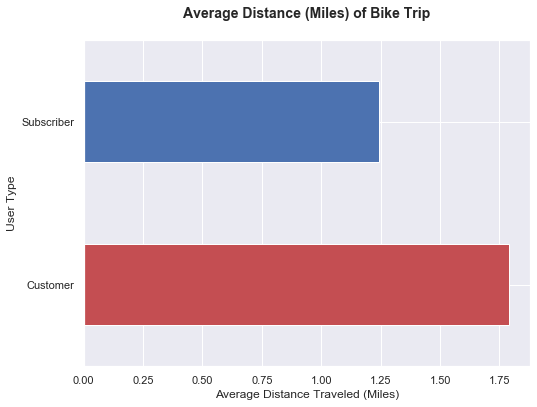

In [30]:
# Customer Usage by Distance vs. Subscriber Usage by Distance
user_dist_mean = df_clean.groupby('user_type')['distance_miles'].mean()
plt.figure(figsize=(8, 6))
user_dist_mean.plot(kind='barh', color=['r', 'b']);
plt.title('Average Distance (Miles) of Bike Trip', y=1.05, fontsize=14, fontweight='bold')
plt.ylabel('User Type')
plt.xlabel('Average Distance Traveled (Miles)');

Not only duration, Customers have a higher overall of trip duration compared with Subscribers.

#### Distribution of Bike Trip Distance by User Type

In [31]:
# Subset of dataset with distance < 5
df_distancesub = df_clean.loc[df_clean['distance_miles'] <= 5]

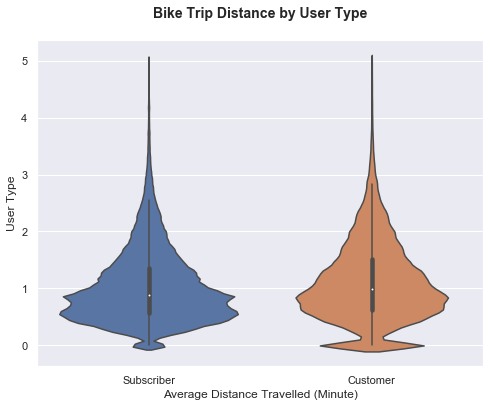

In [32]:
# Distribution of distance
plt.figure(figsize=(8, 6))
sns.violinplot(data = df_distancesub, 
            x = 'user_type', 
            y = 'distance_miles');
plt.title('Bike Trip Distance by User Type', y=1.05, fontsize=14, fontweight='bold')
plt.ylabel('User Type')
plt.xlabel('Average Distance Travelled (Minute)');

### Part E 
### Relationship between trip duration and distance

#### Relationship between Duration and Distance of Bike Trip

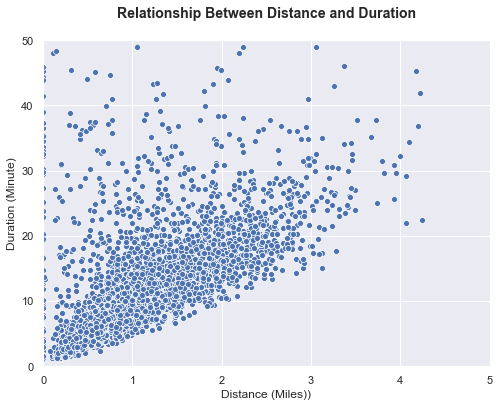

In [33]:
# Scatterplot suitable for two quantitati
plt.figure(figsize = (8, 6))
sns.scatterplot(data=df_clean.sample(5000), x='distance_miles', y='duration_min')
plt.xlim(0, 5)
plt.ylim(0, 50);
plt.title('Relationship Between Distance and Duration', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('Distance (Miles))')
plt.ylabel('Duration (Minute)');

Overall, they are positively correlated wuhere a longer distance of trip takes much time.

#### Relationship Between Distance and Duration by User Type

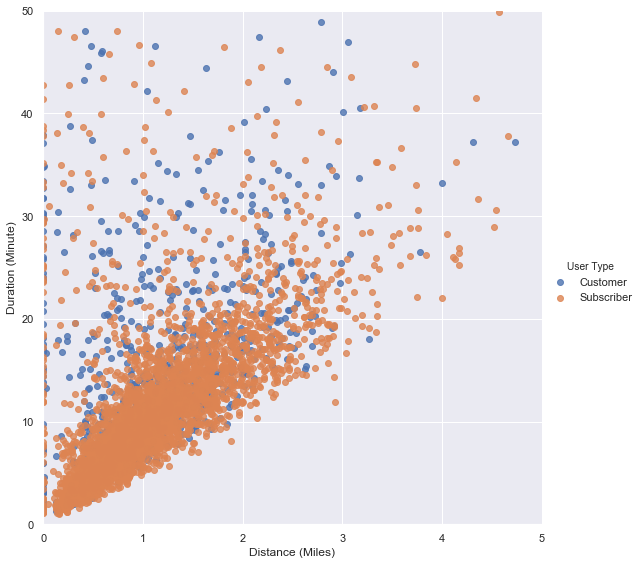

In [34]:
g = sns.FacetGrid(data=df_clean.sample(5000), hue='user_type', height=8)
g.map(sns.regplot, 'distance_miles', 'duration_min', fit_reg=False)
g.add_legend(title = 'User Type')
g.set_xlabels('Distance (Miles)');
g.set_ylabels('Duration (Minute)');
plt.xlim(0, 5)
plt.ylim(0, 50);

As an overview, both user type takes longer time if they travelled a long distance. However, in the top left region which indicate short distance with a longer time, the portion of Customers is significally greater than Subscribers. Once again, this suggests that most of the Subsribes use the bike for commute purpose.

### Part F 
### User behavior

#### Bay Wheels Users Distribution

In [35]:
user = df_clean.user_type.value_counts()
user

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

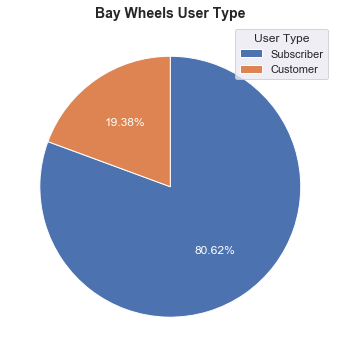

In [36]:
# Pie to show distribution
plt.figure(figsize = (8, 6))
plt.pie(user, labels = user.index, startangle = 90, autopct= '%1.2f%%', counterclock = False, textprops={'color':'white'});
plt.legend(user.index, 
           title='User Type', 
           loc='upper right')
plt.title('Bay Wheels User Type', fontsize=14,  fontweight='bold');

More than 80% of Bay Wheels users are Subscriber.

#### Rental Access Method by User Type

In [37]:
df_clean_sub = df_clean.groupby(['user_type', 'rental_access_method']).size().reset_index()
df_clean_sub.rename(columns={0:'num_of_trips'}, inplace=True)
df_clean_sub

,user_type,rental_access_method,num_of_trips
0,Customer,app,13479
1,Customer,clipper,1018
2,Subscriber,app,94531
3,Subscriber,clipper,11810


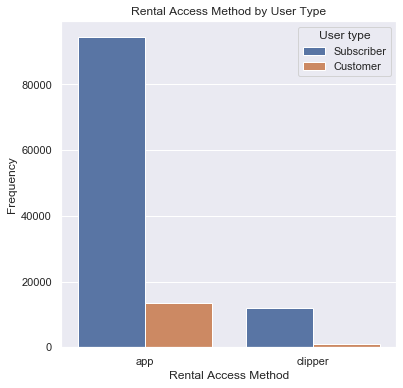

In [38]:
plt.figure(figsize=(6, 6))
sns.countplot(data = df_clean, x = 'rental_access_method', hue = 'user_type');
plt.xlabel('Rental Access Method')
plt.ylabel('Frequency')
plt.title('Rental Access Method by User Type')
plt.legend(title='User type');

Rent a bike via app is preferred for both Subscriber and Customer.

#### Duration and Bike Sharing Preference by User Type

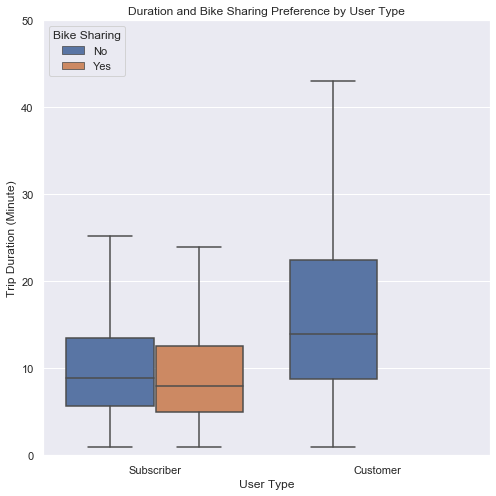

In [39]:
# Use boxplot
plt.figure(figsize=(8, 8))
sns.boxplot(data = df_clean, x = 'user_type', y = 'duration_min', hue = 'bike_share_for_all_trip', showfliers=False)
plt.title('Duration and Bike Sharing Preference by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (Minute)')
plt.legend(title = 'Bike Sharing', loc = 2)
plt.ylim(0, 50);

### Final Selection

## Rental Access Method

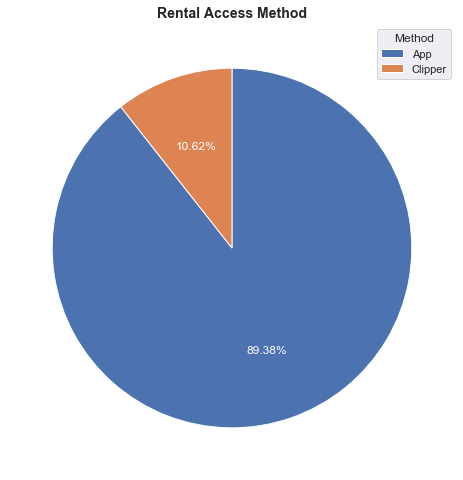

In [41]:
rental = df_clean.rental_access_method.value_counts()
rental

# Pie to show distribution
plt.figure(figsize=[14.70, 8.27])
plt.pie(rental, labels = rental.index, startangle = 90, autopct= '%1.2f%%', counterclock = False, textprops={'color':'white'});
plt.legend(['App', 'Clipper'], #rental.index
           title='Method', 
           loc='upper right')
plt.title('Rental Access Method', fontsize=14,  fontweight='bold');

> Almost 90% of Bay Wheels users tend to user app to rent a bike. Since the app is preferred, we can enhance the app feature to bring better user experience.

## Bay Wheels Montly Usage by User Type

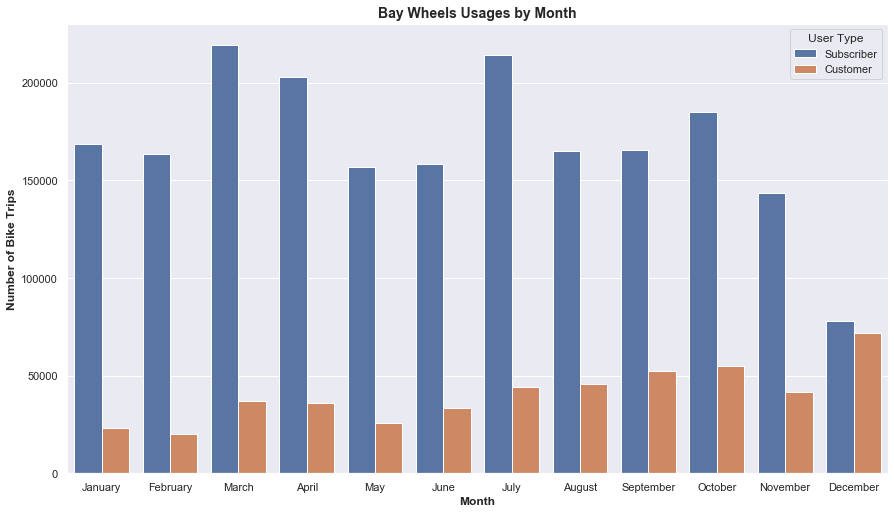

In [42]:
# Monthly usage of the Bay Wheels by each user type
plt.figure(figsize=[14.70, 8.27])
ax = sns.countplot(data = df_clean, 
                   x = 'start_time_month', 
                   hue='user_type')
ax.set_title('Bay Wheels Usages by Month', fontdict = {'fontsize':14,  'fontweight':'bold'})
ax.set_xlabel('Month', fontsize = 12, weight = "bold")
ax.set_ylabel('Number of Bike Trips', fontsize = 12, weight = "bold")
#ax.set(xlabel='Month', ylabel='Number of Bike Trips', title='Bay Wheels Usage by Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(title='User Type');

> In overall, Subscribers always have a relatively high usages of Bay Wheels service compared to customers in almost every month except December which difference  is not significant.

## Distribution of Bike Trip Duration by User Type

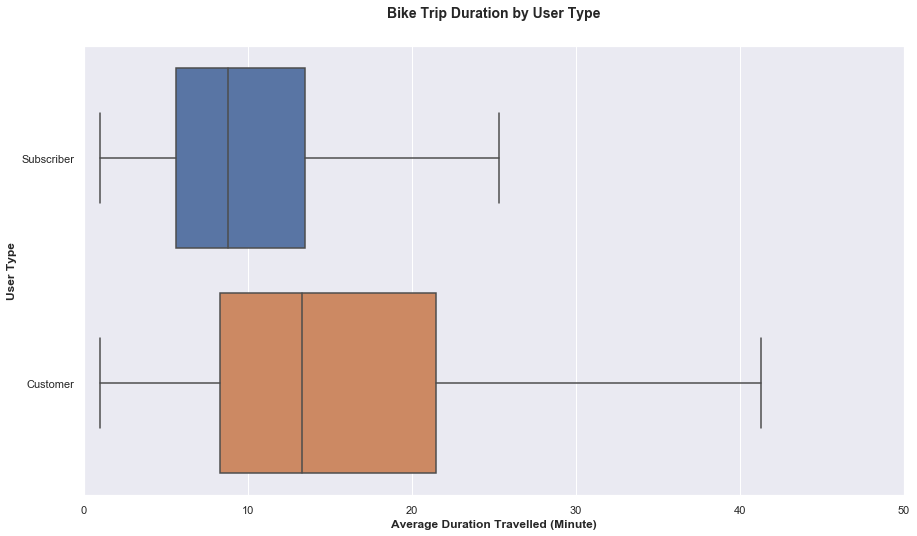

In [43]:
# Distribution of duration
plt.figure(figsize=[14.70, 8.27])
sns.boxplot(data = df_clean, 
            y = 'user_type', 
            x = 'duration_min',
            showfliers = False);
plt.title('Bike Trip Duration by User Type', y=1.05, fontsize=14, fontweight='bold')
plt.ylabel('User Type', fontsize = 12, weight = "bold")
plt.xlabel('Average Duration Travelled (Minute)', fontsize = 12, weight = "bold")
plt.xlim(0, 50);

> This figure shows that customers will use the bike longer compared to subsriber. We can assume most of the subscribers use the bike for a short travel, for work or study while customers is tends to enjoy the bike trip.

## Bike Usage by  Hour by Day of Week

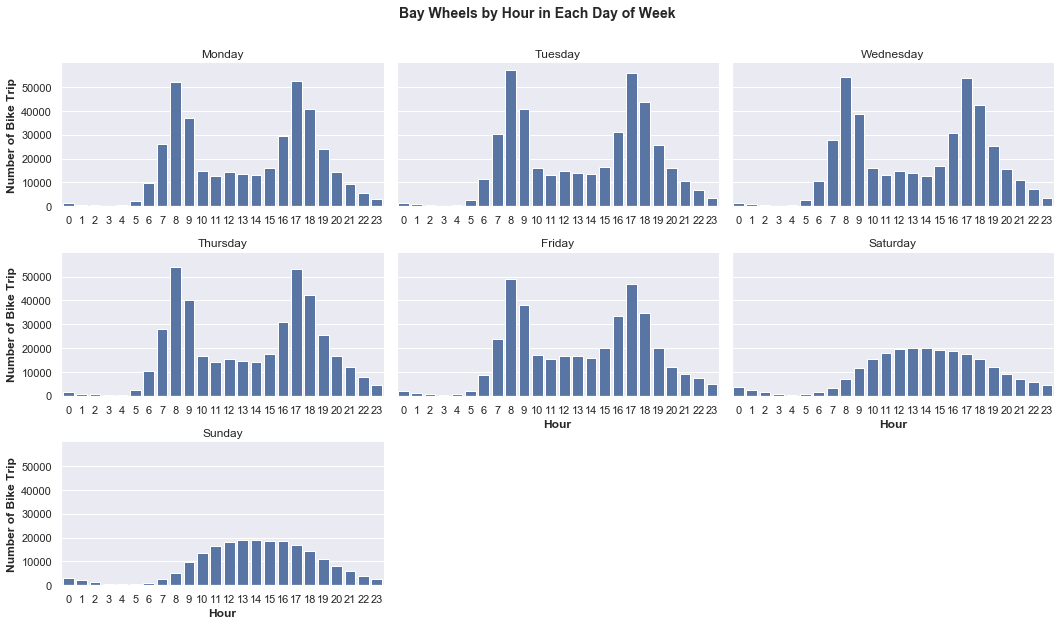

In [44]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayClasses = pd.api.types.CategoricalDtype(ordered = True, categories = day_order)
df_clean['start_time_weekday'] = df_clean['start_time_weekday'].astype(dayClasses)

g = sns.FacetGrid(data = df_clean, col = 'start_time_weekday', col_wrap = 3, height = 8.27/3,  aspect = (14.70/3)/(8.27/3), sharex = False)
g.map(sns.countplot, 'start_time_hour',  color = base_color)
g.set_titles('{col_name}')
g.set_xlabels('Hour', fontsize = 12, weight = "bold");
g.set_ylabels('Number of Bike Trip', fontsize = 12, weight = "bold");
g.fig.suptitle('Bay Wheels by Hour in Each Day of Week', y=1.05, fontsize=14, fontweight='bold');

> We can see the similar trend from Monday to Friday where usage are highly distributed in commute time while usages in Saturday and Sunday are distributed at evening session. We can conclude that most of the user take the bike to travel either to work or study.

## Duration and Bike Sharing Preference by User Type

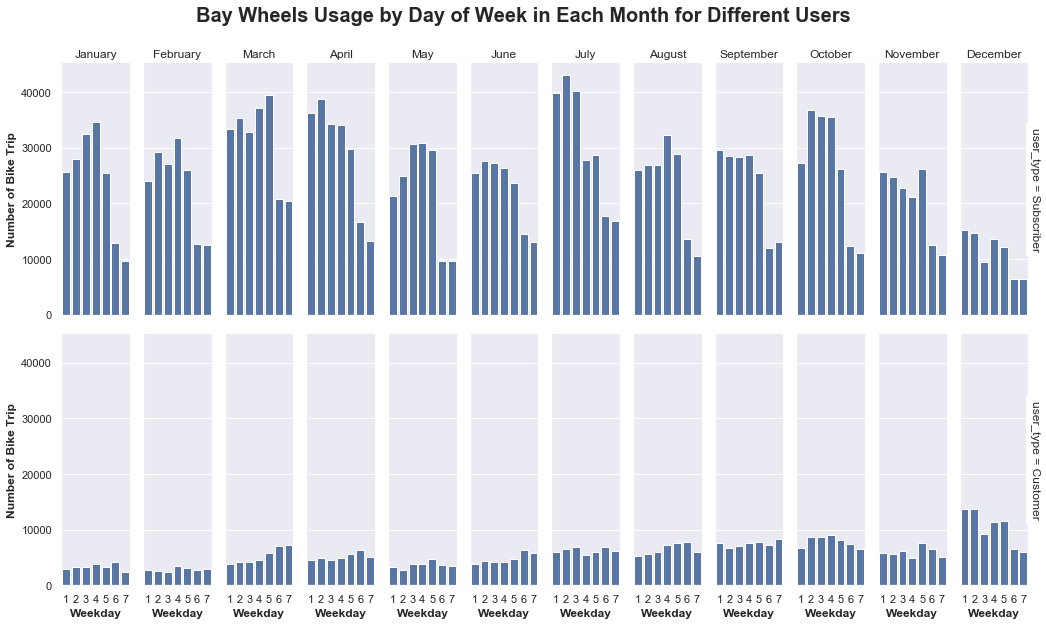

In [45]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
g = sns.FacetGrid(data = df_clean, col = 'start_time_month', row = 'user_type', height = 8.27/2,  aspect = (14.70/12)/(8.27/2), 
                  margin_titles = True)
g.map(sns.countplot, 'start_time_weekday',  color = base_color, order = day_order)
g.set_titles(row_template = '', col_template = '{col_name}')
g.set_xlabels('Weekday', fontsize = 12, weight = "bold");
g.set_ylabels('Number of Bike Trip', fontsize = 12, weight = "bold");
g.fig.suptitle('Bay Wheels Usage by Day of Week in Each Month for Different Users', y=1.05, fontsize=20, fontweight='bold')
g.set(xticklabels=['1', '2', '3', '4', '5', '6', '7'])
plt.tight_layout();

> From the visualization above, we can see the difference of usage by day of week is not significant in Customers. We can conclude again most of the Subcribers take the bike to work and study so the weekdays usage is always higher while well distributed shape found in frequency of bike usage in Customer suggest that they are using Bay Wheels service for different purposes